<a href="https://colab.research.google.com/github/afipolinema/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(True, Text(0.5, 1.0, 'Citra Hasil Dilasi'))

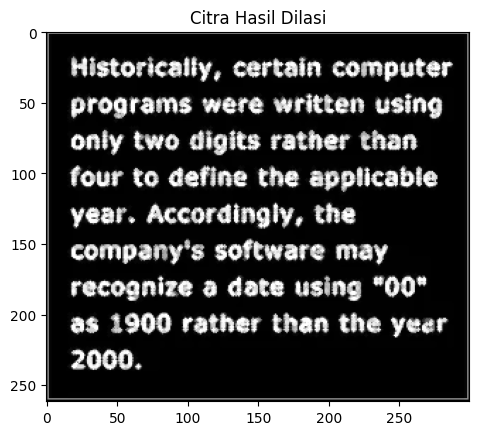

In [13]:
#Nomer3
img2= cv2.imread('/content/drive/MyDrive/Week9/morphology.png',0)
#Acquire size of the image
p,q= img2.shape
#Show the image
plt.imshow(img2, cmap="gray")
#Define new image to store the pixels of dilated image
imgDilate= np.zeros((p,q), dtype=np.uint8)
#Define the structuring element 
SED= np.array([[0,1,0], [1,1,1],[0,1,0]])
constant1=1
#Dilation operation without using inbuilt CV2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp= img2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product= temp*SED
    imgDilate[i,j]= np.max(product)

plt.imshow(imgDilate,cmap="gray")
cv2.imwrite('dilasi.png',imgDilate),plt.title('Citra Hasil Dilasi')

[[0 1 0]
 [1 1 1]
 [0 1 0]]


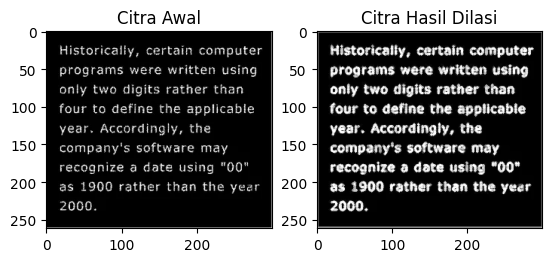

In [14]:
#Nomer 4
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
dilation = cv2.dilate(img2, kernel, iterations=1)

# cetak structuring element
print(kernel)

plt.subplot(121), plt.imshow(img2, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap='gray'), plt.title('Citra Hasil Dilasi')

plt.show()

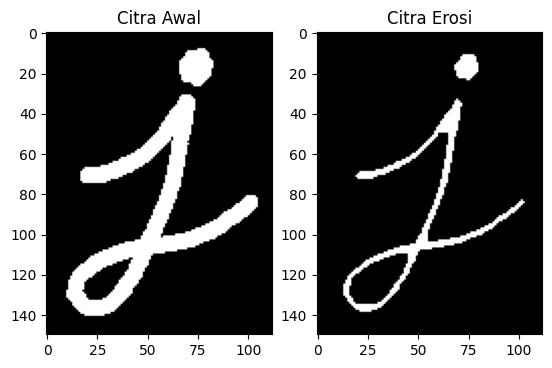

In [16]:
#Nomer 5
# Membaca citra
img = cv2.imread('/content/drive/MyDrive/Week9/j.png', cv2.IMREAD_GRAYSCALE)

# Menampilkan citra asli
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')

# Inisialisasi ukuran kernel dan citra hasil erosi
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
erosion = np.zeros_like(img)

# Konstanta padding
constant = (kernel_size - 1) // 2

# Operasi erosi
for i in range(constant, img.shape[0] - constant):
    for j in range(constant, img.shape[1] - constant):
        temp = img[i - constant:i + constant + 1, j - constant:j + constant + 1]
        product = temp * kernel
        erosion[i, j] = np.min(product)

# Menampilkan citra hasil erosi
plt.subplot(122)
plt.imshow(erosion, cmap='gray')
plt.title('Citra Erosi')

plt.show()

(<Axes: title={'center': 'Citra Erosi'}>,
 Text(0.5, 1.0, 'Citra Erosi'))

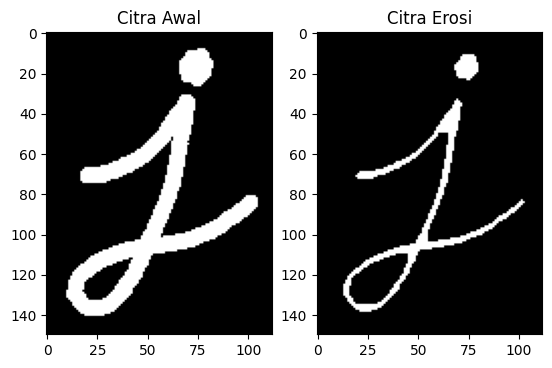

In [17]:
#Nomer 6
imgJ = cv2.imread('/content/drive/MyDrive/Week9/j.png')
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(imgJ, kernel, iterations = 1)

plt.subplot(121), plt.imshow(imgJ), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Erosi')

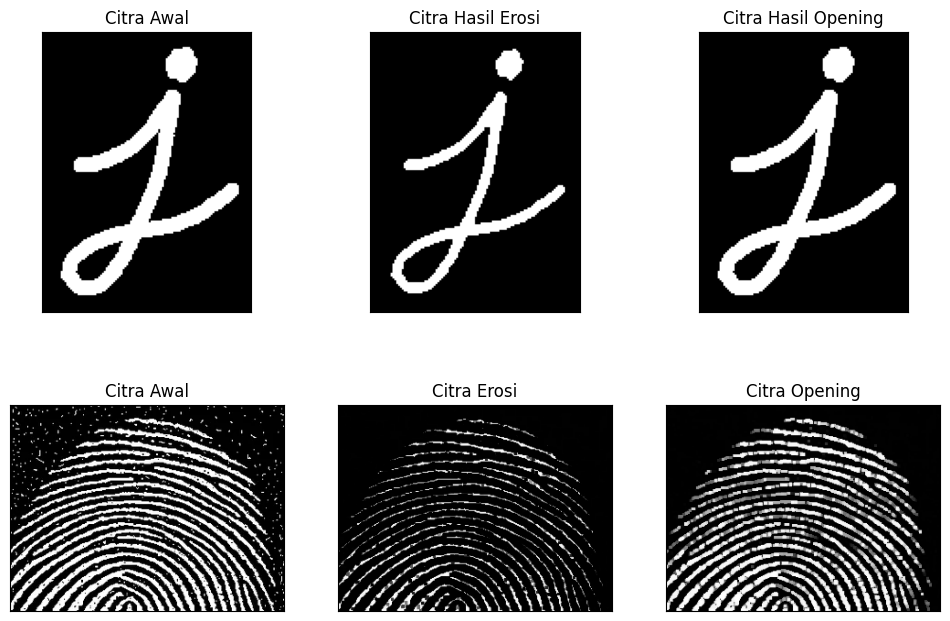

In [18]:
#Nomer 7
# Erosi
kernel = np.ones((3,3), np.uint8)
erosion = np.zeros_like(img)
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        temp = img[i-1:i+2, j-1:j+2]
        erosion[i,j] = np.min(temp)

# Opening
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Menampilkan gambar
plt.figure(figsize=(12,8))

plt.subplot(231), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(erosion, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(opening, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

# Menggunakan Library Morphology dari OpenCV
img = cv2.imread('/content/drive/MyDrive/Week9/fingerprint.png', 0)

# Erosi
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
# Opening
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Menampilkan gambar
plt.subplot(234), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(erosion, cmap='gray')
plt.title('Citra Erosi'), plt.xticks([]), plt.yticks([])

plt.subplot(236), plt.imshow(opening, cmap='gray')
plt.title('Citra Opening'), plt.xticks([]), plt.yticks([])

plt.show()

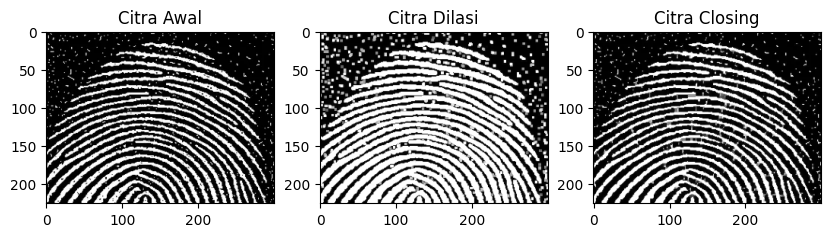

In [19]:
#Nomer 8
# Baca citra
img = cv2.imread('/content/drive/MyDrive/Week9/fingerprint.png', 0)

# Operasi closing dengan SE square 3 x 3 menggunakan library morphology dari OpenCV
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Operasi dilasi dengan SE square 3 x 3 menggunakan library morphology dari OpenCV
dilation = cv2.dilate(img, kernel, iterations=1)

# Tampilkan gambar
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilation, cmap='gray')
axs[1].set_title('Citra Dilasi')
axs[2].imshow(closing, cmap='gray')
axs[2].set_title('Citra Closing')
plt.show()

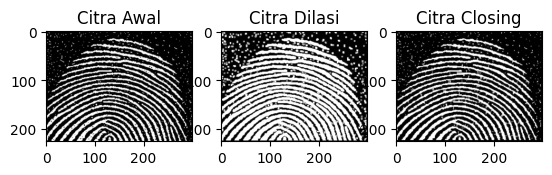

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
img = cv2.imread('/content/drive/MyDrive/Week9/fingerprint.png', 0)

# Tampilkan citra awal
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')

# Proses dilasi
k = np.ones((3,3), np.uint8)
dilation = np.zeros_like(img)
m, n = img.shape

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1:i+2, j-1:j+2]
        dilation[i,j] = np.max(temp)

# Tampilkan citra setelah dilasi
plt.subplot(132)
plt.imshow(dilation, cmap='gray')
plt.title('Citra Dilasi')
# Proses closing
closing = np.zeros_like(img)

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = dilation[i-1:i+2, j-1:j+2]
        closing[i,j] = np.min(temp)

# Tampilkan citra hasil closing
plt.subplot(133)
plt.imshow(closing, cmap='gray')
plt.title('Citra Closing')

plt.show()

SED = Cross 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

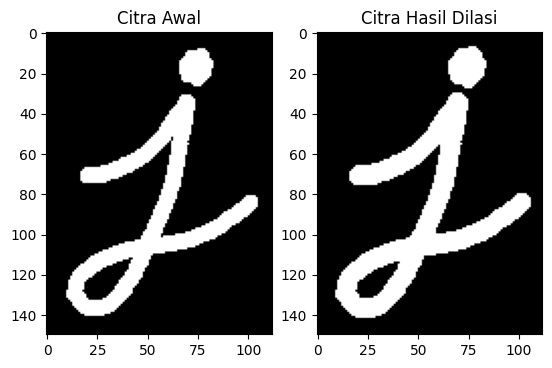

In [21]:
#Nomer 9
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) 
dilation = cv2.dilate(imgJ, kernel, iterations = 1)

print("SED = Cross 3")

plt.subplot(121),plt.imshow(imgJ),plt.title('Citra Awal') 
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Cross 5


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

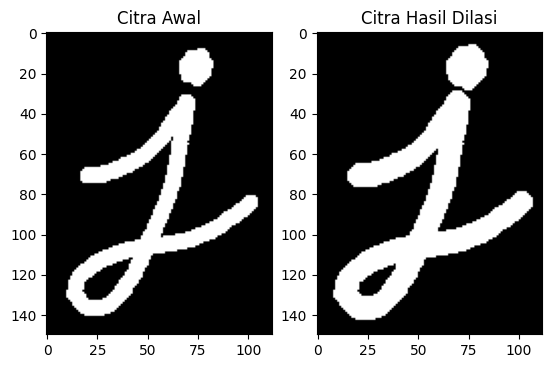

In [22]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)) 
dilation = cv2.dilate(imgJ, kernel, iterations = 1)

print("SED = Cross 5")

plt.subplot(121),plt.imshow(imgJ),plt.title('Citra Awal') 
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Circle 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

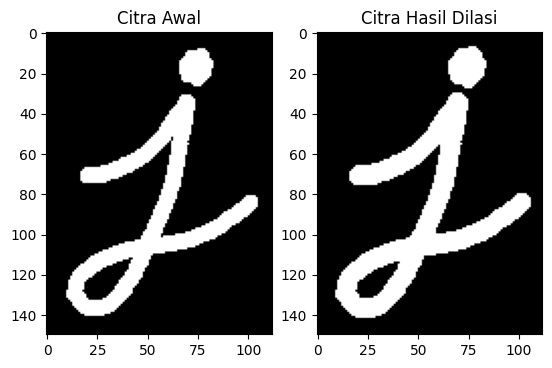

In [23]:
#Nomer 10
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)) 
dilation = cv2.dilate(imgJ, kernel, iterations = 1) 

print("SED = Circle 3")

plt.subplot(121),plt.imshow(imgJ),plt.title('Citra Awal') 
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Circle 5


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

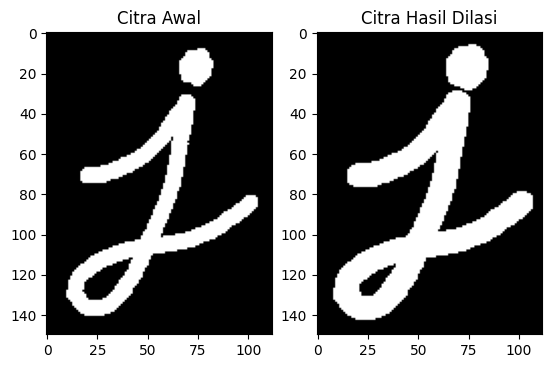

In [24]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) 
dilation = cv2.dilate(imgJ, kernel, iterations = 1) 

print("SED = Circle 5")

plt.subplot(121),plt.imshow(imgJ),plt.title('Citra Awal') 
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SE = Rectangle 3x5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

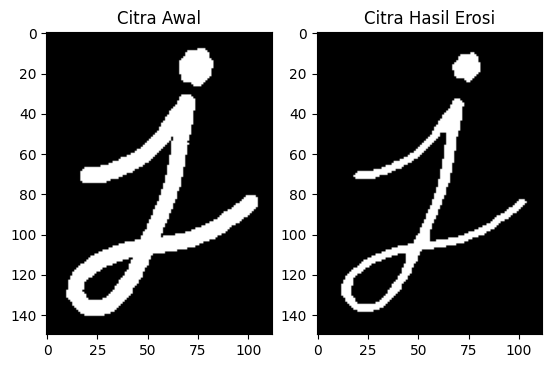

In [25]:
#Nomer 11
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5)) 
erosion = cv2.erode(imgJ, kernel, iterations = 1)

print("SE = Rectangle 3x5")

plt.subplot(121), plt.imshow(imgJ), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Rectangle 5x7


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

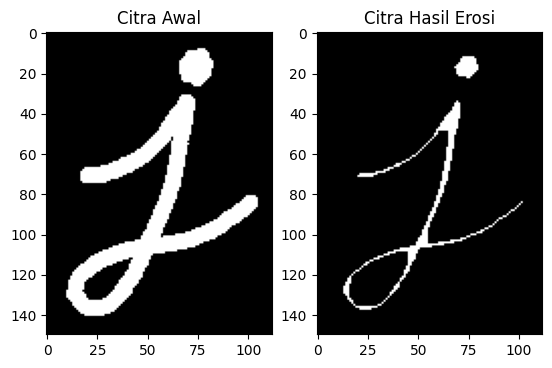

In [26]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7)) 
erosion = cv2.erode(imgJ, kernel, iterations = 1)

print("SE = Rectangle 5x7")

plt.subplot(121), plt.imshow(imgJ), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Line Vertikal 3


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

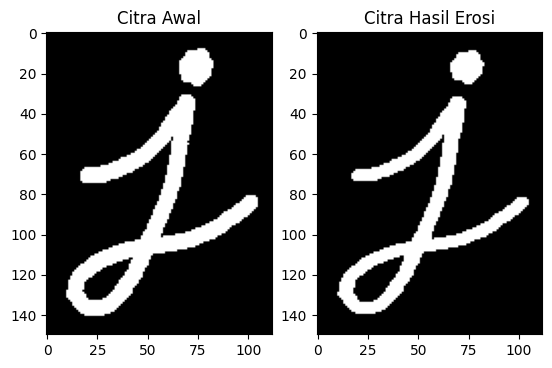

In [27]:
#Nomer 12
kernel = np.ones((3,1),np.uint8) 
erosion = cv2.morphologyEx(imgJ, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 3")

plt.subplot(121), plt.imshow(imgJ), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Line Vertikal 5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

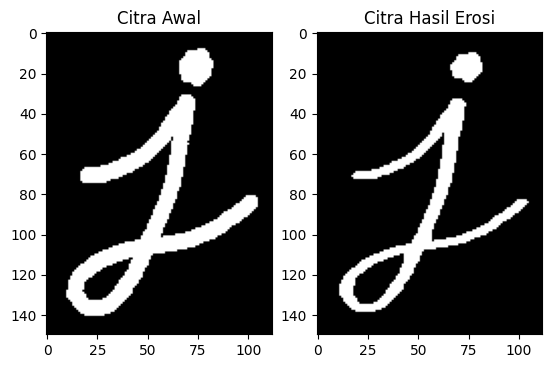

In [28]:
kernel = np.ones((5,1),np.uint8) 
erosion = cv2.morphologyEx(imgJ, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 5")

plt.subplot(121), plt.imshow(imgJ), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')